In [1]:
import qiskit
qiskit.__version__

'0.20.2'

In [2]:
qiskit.__qiskit_version__

{'qiskit-terra': '0.20.2', 'qiskit-aer': '0.10.4', 'qiskit-ignis': '0.7.1', 'qiskit-ibmq-provider': '0.19.1', 'qiskit-aqua': None, 'qiskit': '0.36.2', 'qiskit-nature': None, 'qiskit-finance': '0.3.2', 'qiskit-optimization': '0.3.2', 'qiskit-machine-learning': None}

# Question 8
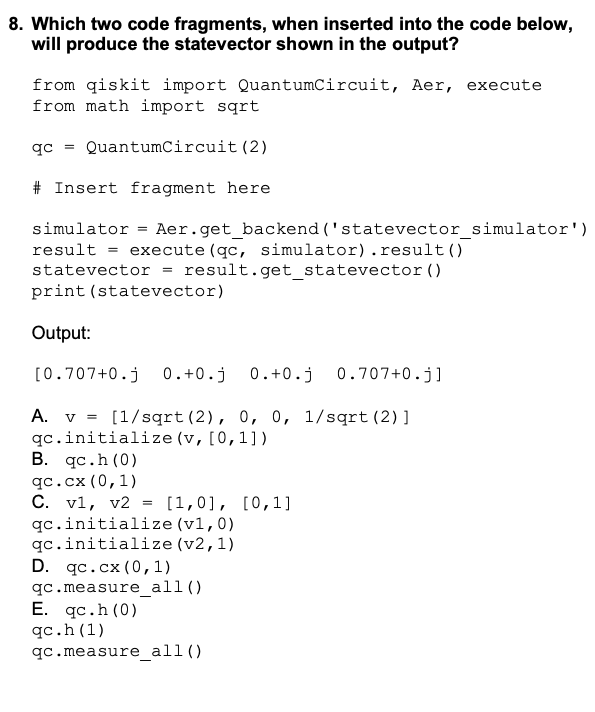

In [3]:
#Import the required packages
from qiskit import QuantumCircuit, QuantumRegister,ClassicalRegister,Aer,execute
from qiskit.visualization import *
from math import sqrt

## In this question, we deal with different ways to obtain the given statevector output

In [4]:
v=[1/sqrt(2),0,0,1/sqrt(2)]

In [5]:
v

[0.7071067811865475, 0, 0, 0.7071067811865475]

# The given statevector output can be obtained  : 
## 1. Generate a Bell pair 
## 2. Initialize the 2-qubits with entangled states (|00> and |11>

$|\Phi^+\rangle = \frac{1}{\sqrt{2}}\left(|00\rangle + |11\rangle\right)$

# Let's us now consider the options

## OPTION A

### Initialize qubits in a specific state.
### In this ,we do initialization of a qubit with a given state using initialize() from quantum circuit

For more examples , we can refer to 
https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.initialize.html

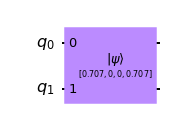

In [6]:
qc_bell=QuantumCircuit(2)
v=[1/sqrt(2),0,0,1/sqrt(2)]
qc_bell.initialize(v,[0,1])
qc_bell.draw('mpl')

In [8]:
backend=Aer.get_backend('statevector_simulator')
job=execute(qc_bell,backend)
result=job.result()
sv=result.get_statevector()
print("Statvector :",sv)

Statvector : Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


In [9]:
sv.draw(output="latex")

<IPython.core.display.Latex object>

# OPTION B

## The statevector is similar to one of the following Bell-state pair.

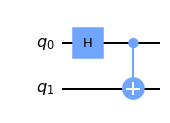

In [10]:
#Create a Quantum Circuit with 2 qubits 
qc_bell=QuantumCircuit(2)
qc_bell.h(0)
qc_bell.cx(0,1)

qc_bell.draw('mpl')

In [11]:
backend=Aer.get_backend('statevector_simulator')
job=execute(qc_bell,backend)
result=job.result()
sv=result.get_statevector()
print("Statvector :",sv)

Statvector : Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


In [12]:
sv.draw(output="latex")

<IPython.core.display.Latex object>

## OPTION C

### In this, 2 qubits are initialize individually with their respective states
### qubit 0 is initialized with |1> state with [0,1]
### qubit 1 is initailized with |0> state with [1,0]

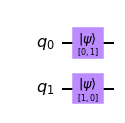

In [13]:
qc_2=QuantumCircuit(2)
v1, v2=[0,1],[1,0]
qc_2.initialize(v1,0)
qc_2.initialize(v2,1)
qc_2.draw('mpl')

In [14]:
backend=Aer.get_backend('statevector_simulator')
job=execute(qc_2,backend)
result=job.result()
sv=result.get_statevector()
print("Statvector :",sv)

Statvector : Statevector([0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))


In [15]:
sv.draw(output="latex")

<IPython.core.display.Latex object>

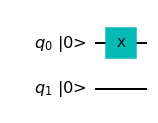

In [16]:
#Create a Quantum Circuit with 2 qubits 
qc_3=QuantumCircuit(2)
qc_3.x(0)
qc_3.draw('mpl',initial_state=True)

In [17]:
backend=Aer.get_backend('statevector_simulator')
job=execute(qc_3,backend)
result=job.result()
sv=result.get_statevector()
print("Statvector :",sv)

Statvector : Statevector([0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))


In [18]:
sv.draw(output="latex")

<IPython.core.display.Latex object>

## OPTION D

### 2-qubit Quantum circuit with a CNOT gate

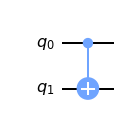

In [19]:
#Create a Quantum Circuit with 2 qubits 
qc_4=QuantumCircuit(2)
qc_4.cx(0,1)
qc_4.draw('mpl')

In [20]:
backend=Aer.get_backend('statevector_simulator')
job=execute(qc_4,backend)
result=job.result()
sv=result.get_statevector()
print("Statvector :",sv)

Statvector : Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))


In [21]:
sv.draw(output="latex")

<IPython.core.display.Latex object>

## OPTION E

### 2-qubit Quantum circuit where both the qubits are in superposition.

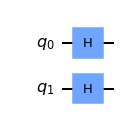

In [22]:
#Create a Quantum Circuit with 2 qubits 
qc_5=QuantumCircuit(2)
qc_5.h(0)
qc_5.h(1)
qc_5.draw('mpl')

In [23]:
backend=Aer.get_backend('statevector_simulator')
job=execute(qc_5,backend)
result=job.result()
sv=result.get_statevector()
print("Statvector :",sv)

Statvector : Statevector([0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j],
            dims=(2, 2))


In [24]:
sv.draw(output="latex")

<IPython.core.display.Latex object>

# Correct Options: A and B